# Import Libraries

In [ ]:
# Libraries for data manipulation
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Libraries fo data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

#Load the Model classes

## Evluation Metrics

In [ ]:
# Accuracy
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
# R Squared

def R2(Y, Y_hat):
    """
    Calculates the coefficient of determination (R-squared)
    between the predicted values (Y_hat)
    and the actual values (Y) in a regression problem.

    Parameters:
        Y (array-like): The actual values or target variable.
        Y_hat (array-like): The predicted values obtained from a regression model.

    Returns:
        float: The R-squared value.
    """
    numerator = np.sum((Y - Y_hat) ** 2)
    denominator = np.sum((Y - np.mean(Y)) ** 2)

    r_squared = 1 - (numerator / denominator)

    return r_squared

In [ ]:
# Odinary Least Squares

def OLS(Y, Y_hat, N=None):
    """
    Calculates the ordinary least squares (OLS) loss between the predicted values (Y_hat)
    and the actual values (Y) in a regression problem.

    Parameters:
        Y (array-like): The actual values or target variable.
        Y_hat (array-like): The predicted values obtained from a regression model.
        N (int, optional): The number of observations in the dataset.
                            If not provided, it is determined automatically based on the length of Y.

    Returns:
        float: The OLS loss value.
    """
    if N is None:
        N = len(Y)

    return (1 / (2 * N) * np.sum((Y - Y_hat) ** 2))

## KNN

In [ ]:
class KNNClassifier():

  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self,X,k,epsilon=1e-3):

    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:k]
      gamma_k =1/(np.sqrt(dist2[idxt] +epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

## MultiVariate Linear Regressor

In [ ]:
# MultiVariate Linear Regressor

class MVLinearRegression():
    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape
        Y = y

        # Initialize the weights
        self.W = np.random.randn(D)

        J = np.zeros(epochs)

        for epoch in range(epochs):
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat, N)
            # Weight update rule:
            self.W -= eta * (1 / N) * (X.T @ (Y_hat - Y))

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()

    def predict(self, X):
        return X @ self.W

In [ ]:
# Function to get zipcode from latitude and longitude
from geopy.geocoders import Nominatim

def zipcode(latitude, longitude):
    geolocator = Nominatim(user_agent="DSUnited")
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    address = location.raw['address']
    zipcode = address.get('postcode', '')
    return zipcode

In [ ]:
# Function to get latitude and longitude from address
from geopy.geocoders import Nominatim

def get_latitude_longitude(address):
    geolocator = Nominatim(user_agent="DSUnited")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

In [ ]:
# Example usage
address = "5075 Fairmont Rd SE"  # Example address
latitude, longitude = get_latitude_longitude(address)
print(latitude, longitude)

40.015269 -82.384456


In [ ]:
# Function to get address from latitude and longitude
from geopy.geocoders import Nominatim

def get_address(latitude, longitude):
  geolocator = Nominatim(user_agent="my-app")
  location = geolocator.reverse((latitude, longitude))

  address = location.address
  return address


In [ ]:
get_address(37.7749, -122.4194)

'Market Street & South Van Ness Avenue, Market Street, Hayes Valley, San Francisco, CAL Fire Northern Region, California, 94102, United States'

In [ ]:
get_address(40.015269, -82.384456)

'Fairmont Road Southeast, Franklin Township, Licking County, Ohio, 43056, United States'

# Load the data

In [ ]:
housedf = pd.read_csv("Cleaned_Data.csv", index_col=False)
housedf

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count
0,0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.0,4,2
1,1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.0,2,2
2,4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.0,5,2
3,5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.0,5,3
4,6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,0.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,4988,21814465,534000.0,85739,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,1,180.0,10,2
4361,4989,21902512,545000.0,85745,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,1,12.0,7,1
4362,4993,21908358,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,2,6.0,10,2
4363,4994,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,1,198.0,10,1


In [ ]:
housedf.drop("Unnamed: 0", axis=1, inplace=True)
housedf

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.0,4,2
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.0,2,2
2,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.0,5,2
3,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.0,5,3
4,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,0.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,21814465,534000.0,85739,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,1,180.0,10,2
4361,21902512,545000.0,85745,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,1,12.0,7,1
4362,21908358,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,2,6.0,10,2
4363,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,1,198.0,10,1


In [ ]:
housedf.sample(20)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count
3220,21324249,590000.0,85737,-110.979826,32.384973,0.86,5190.00,1977,4,4.0,4114.0,2.0,2,7.00,5,2
4065,21816429,557000.0,85623,-110.926474,32.586511,0.21,3557.58,2013,3,4.0,2819.0,3.0,2,194.51,12,2
2859,21805974,649000.0,85718,-110.958261,32.307409,1.31,7895.25,1981,5,4.0,4659.0,3.0,3,8.33,7,4
3257,21627682,600000.0,85750,-110.854461,32.287900,1.11,5889.00,1987,2,2.0,2607.0,3.0,1,130.00,5,1
914,21501919,920000.0,85737,-110.945878,32.388165,2.16,9771.43,1997,3,6.0,3972.0,3.0,4,73.00,6,2
2879,21123822,572500.0,85718,-110.901471,32.320613,0.00,6278.00,2001,5,4.0,3541.0,3.0,2,80.00,5,2
1054,21919595,875000.0,85749,-110.707646,32.269328,3.10,9318.00,1985,5,5.0,4833.0,3.0,3,187.00,12,4
274,21400080,1275000.0,85718,-110.936519,32.339087,1.51,15341.00,2009,4,5.0,5327.0,3.0,2,153.00,6,3
334,21301644,1300000.0,85737,-110.990831,32.404598,2.12,11532.96,2008,4,5.0,4677.0,3.0,3,50.00,5,2
3551,21514457,517000.0,85716,-110.920729,32.219192,0.91,2893.00,1953,4,3.0,3860.0,0.0,2,0.00,5,1


In [ ]:
# Check for missing values
housedf.isna().sum()

MLS                       0
sold_price                0
zipcode                   0
longitude                 0
latitude                  0
lot_acres                 0
taxes                     0
year_built                0
bedrooms                  0
bathrooms                 0
sqrt_ft                   0
garage                    0
fireplaces                0
HOA                       0
kitchen_features_count    0
floor_covering_count      0
dtype: int64

In [ ]:
# Check for data types
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MLS                     4365 non-null   int64  
 1   sold_price              4365 non-null   float64
 2   zipcode                 4365 non-null   int64  
 3   longitude               4365 non-null   float64
 4   latitude                4365 non-null   float64
 5   lot_acres               4365 non-null   float64
 6   taxes                   4365 non-null   float64
 7   year_built              4365 non-null   int64  
 8   bedrooms                4365 non-null   int64  
 9   bathrooms               4365 non-null   float64
 10  sqrt_ft                 4365 non-null   float64
 11  garage                  4365 non-null   float64
 12  fireplaces              4365 non-null   int64  
 13  HOA                     4365 non-null   float64
 14  kitchen_features_count  4365 non-null   

In [ ]:
housedf.nunique()

MLS                       4365
sold_price                1002
zipcode                     51
longitude                 4185
latitude                  4227
lot_acres                  570
taxes                     4149
year_built                 102
bedrooms                    12
bathrooms                   14
sqrt_ft                   2191
garage                      17
fireplaces                  10
HOA                        371
kitchen_features_count      15
floor_covering_count         6
dtype: int64

MLS is a unique identifier and can be dropped

In [ ]:
housedf.drop("MLS", axis=1, inplace=True)
housedf.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.0,4,2
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.0,2,2
2,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.0,5,2
3,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.0,5,3
4,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,0.0,3,4


In [ ]:
housedf.describe().T

,count,mean,std,min,25%,50%,75%,max
sold_price,4365.0,778251.255104,316304.015169,375000.000000,588000.000000,680000.000000,840000.000000,5.300000e+06
zipcode,4365.0,85724.895991,35.477090,85118.000000,85718.000000,85737.000000,85750.000000,8.632300e+04
longitude,4365.0,-110.910076,0.117568,-112.520168,-110.976393,-110.921423,-110.859163,-1.094546e+02
latitude,4365.0,32.323391,0.154687,31.356362,32.285927,32.320732,32.400682,3.492788e+01
lot_acres,4365.0,3.772213,46.506186,0.000000,0.560000,0.950000,1.530000,2.154000e+03
taxes,4365.0,9694.507565,184816.612715,0.000000,4852.100000,6282.020000,8154.350000,1.221508e+07
year_built,4365.0,1995.055441,16.682308,1893.000000,1988.000000,2000.000000,2006.000000,2.019000e+03
bedrooms,4365.0,3.899427,1.002614,1.000000,3.000000,4.000000,4.000000,3.600000e+01
bathrooms,4365.0,3.803780,1.115026,1.000000,3.000000,4.000000,4.000000,3.500000e+01
sqrt_ft,4365.0,3707.167377,1060.165183,1100.000000,3050.000000,3523.000000,4125.000000,2.191500e+04


In [ ]:
# Rename the sold_price columne to price.
housedf.rename(columns={"sold_price": "price"}, inplace=True)
housedf.head()

,price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.0,4,2
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.0,2,2
2,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.0,5,2
3,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.0,5,3
4,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,0.0,3,4


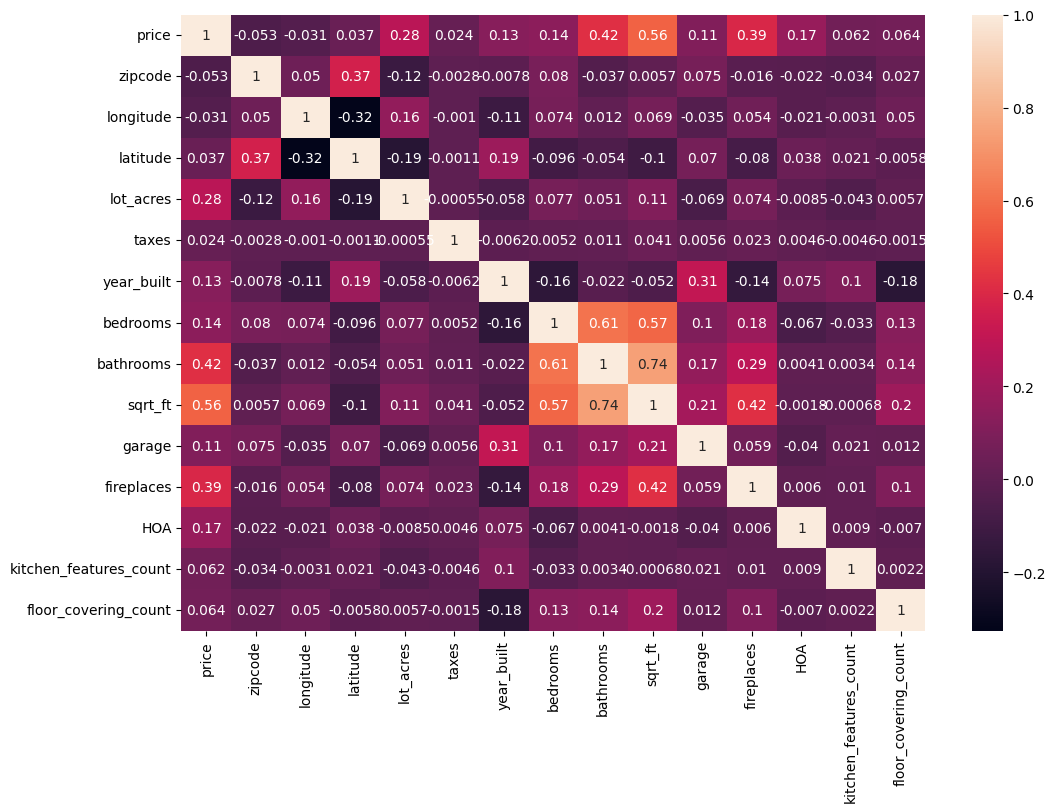

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(housedf.corr(), annot=True)
plt.show()

# Price per square foot

In [ ]:
df = housedf.drop("zipcode", axis=1)
df

,price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count
0,5300000.0,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.0,4,2
1,4200000.0,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.0,2,2
2,3411450.0,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.0,5,2
3,3250000.0,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.0,5,3
4,2400000.0,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,0.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,534000.0,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,1,180.0,10,2
4361,545000.0,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,1,12.0,7,1
4362,565000.0,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,2,6.0,10,2
4363,535000.0,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,1,198.0,10,1


In [ ]:
df['price_per_sqft'] = df['price'] / df['sqrt_ft']
df

,price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count,price_per_sqft
0,5300000.0,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.0,4,2,504.761905
1,4200000.0,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.0,2,2,575.342466
2,3411450.0,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.0,5,2,533.372420
3,3250000.0,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.0,5,3,475.007308
4,2400000.0,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,0.0,3,4,199.584200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,534000.0,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,1,180.0,10,2,199.179411
4361,545000.0,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,1,12.0,7,1,146.505376
4362,565000.0,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,2,6.0,10,2,200.853182
4363,535000.0,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,1,198.0,10,1,254.036087


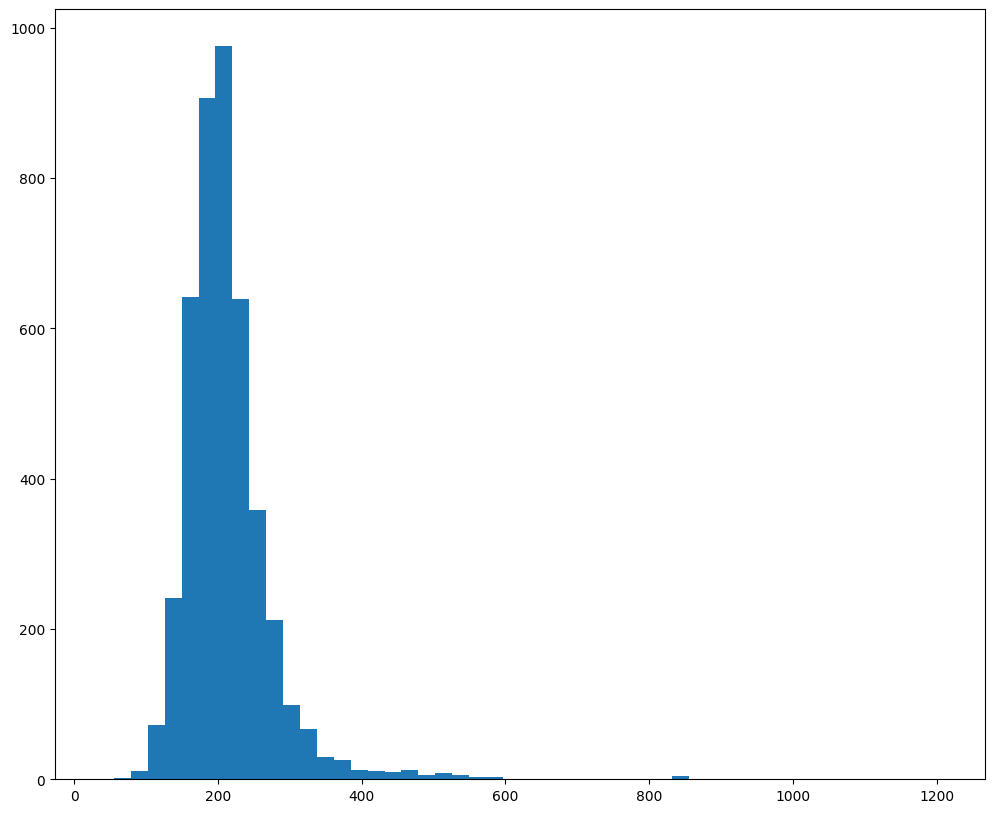

In [ ]:
plt.figure(figsize=(12,10))
plt.hist(df.price_per_sqft, bins=50)
plt.show()

In [ ]:
df = df[(df.price_per_sqft>=100) & (df.price_per_sqft<=800)]

In [ ]:
bins=[100, 150, 200, 250, 300, 350,
      400, 450, 500, 550, 600,
      650, 700, 750, 800]
labels=[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

df['cat'] = pd.cut(x=df.price_per_sqft, bins=bins, labels=labels, include_lowest=True)
df

,price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count,price_per_sqft,cat
0,5300000.0,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.0,4,2,504.761905,5
1,4200000.0,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.0,2,2,575.342466,4
2,3411450.0,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.0,5,2,533.372420,5
3,3250000.0,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.0,5,3,475.007308,6
4,2400000.0,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,6,0.0,3,4,199.584200,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,534000.0,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,1,180.0,10,2,199.179411,12
4361,545000.0,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,1,12.0,7,1,146.505376,13
4362,565000.0,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,2,6.0,10,2,200.853182,11
4363,535000.0,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,1,198.0,10,1,254.036087,10


In [ ]:
# bins=[100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300,
#       320, 340, 360, 380, 400, 420, 440, 460, 480, 500,
#       520, 540, 560, 580, 600, 620, 640, 660, 680, 700,
#       720, 740, 760, 780, 800]
# labels=[34, 33, 32, 31, 30, 29, 28, 27, 26, 25,
#         24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
#         14, 13, 12, 11, 10, 9, 8, 7, 6, 5,
#         4,3,2,1,0]

# df['cat'] = pd.cut(x=df.price_per_sqft, bins=bins, labels=labels, include_lowest=True)
# df

(32.0, 32.6)

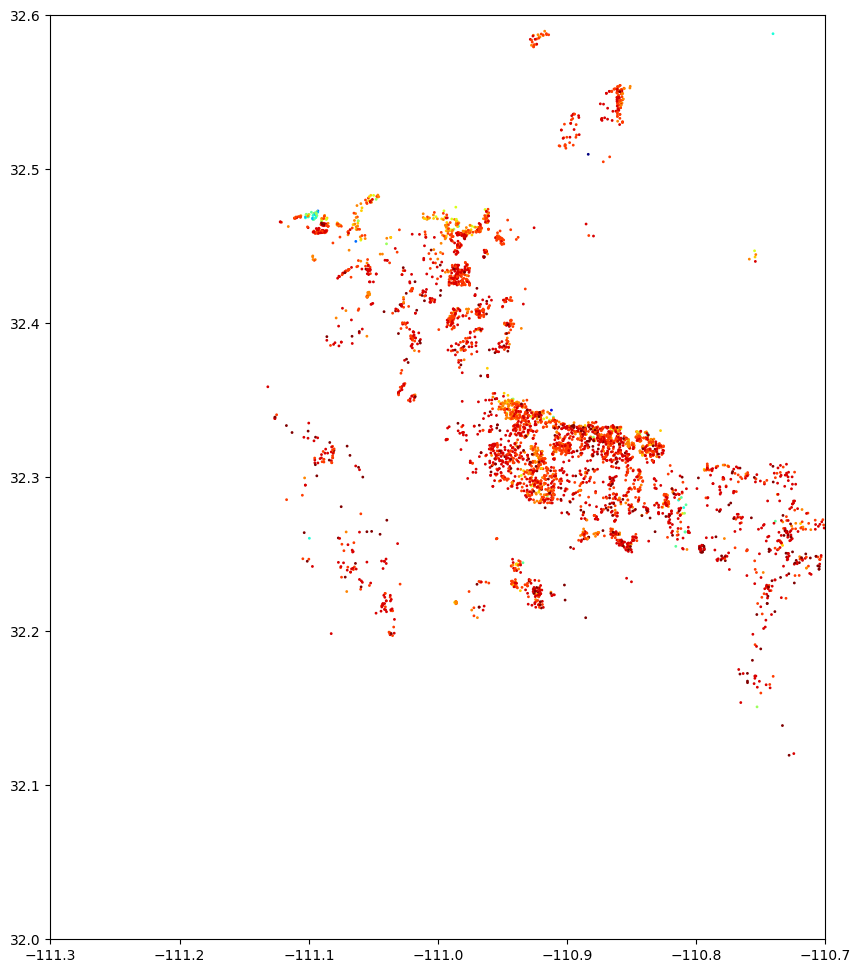

In [ ]:
from matplotlib import cm
jet=cm.get_cmap('jet',14)

plt.figure(figsize=(10,12))
plt.scatter(df.longitude,df.latitude, s=1, c=jet(df.cat))
plt.xlim(-111.3,-110.7)
plt.ylim(32,32.6)

# 1.Split the data into train, validation and test sets

In [ ]:
# Randomly split the data into train and test sets
import random
random.seed(1)


train_ratio = 0.80
train_size = int(len(df) * train_ratio)


train_df = df.sample(n=train_size, random_state=1)
test_df = df.drop(train_df.index)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
train_df.shape, test_df.shape

((3475, 16), (869, 16))

# 2. Train KNN Model

In [ ]:
X_train_knn = train_df[["latitude", "longitude",
                        "year_built","sqrt_ft",
                        "bathrooms","bedrooms",
                        "fireplaces", "garage",
                        "lot_acres", "HOA"]].to_numpy()
y_train_knn = train_df["cat"].to_numpy()

X_train_knn.shape, y_train_knn.shape

((3475, 10), (3475,))

In [ ]:
y_train_knn = y_train_knn.astype(int)

In [ ]:
y_train_knn

array([12, 12, 12, ..., 12, 11, 12])

In [ ]:
np.unique(y_train_knn)

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
# Fit the model
knn = KNNClassifier()
knn.fit(X_train_knn, y_train_knn)

In [ ]:
# Evaluate the model on train set
y_pred_knn = knn.predict(X_train_knn, 7)

print("KNN Train Accuracy: ", accuracy(y_train_knn, y_pred_knn))

KNN Train Accuracy:  0.9968345323741007


In [ ]:
Xtest_knn = test_df[["latitude", "longitude",
                        "year_built","sqrt_ft",
                        "bathrooms","bedrooms",
                        "fireplaces", "garage",
                        "lot_acres", "HOA"]].to_numpy()
ytest_knn = test_df["cat"]

In [ ]:
# Evaluate the model on test set
ytest_pred_knn = knn.predict(Xtest_knn, 7)

print("KNN Test Accuracy: ", accuracy(ytest_knn, ytest_pred_knn))

KNN Test Accuracy:  0.428078250863061


# 4. Prepare data for Linear Regression model

In [ ]:
train_df["knn_predictions"] = y_pred_knn
train_df

,price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count,price_per_sqft,cat,knn_predictions
0,590000.0,-110.982550,32.458240,0.34,5794.20,2003,4,3.0,3322.0,3.0,2,97.0,5,2,177.603853,12,12.0
1,690000.0,-110.833103,32.310405,0.90,7731.34,1997,5,3.0,4504.0,3.0,3,50.0,4,2,153.197158,12,12.0
2,545000.0,-110.978689,31.832598,4.21,4817.00,2001,3,3.0,3004.0,3.0,2,33.0,5,2,181.424767,12,12.0
3,525000.0,-110.853595,32.303503,0.24,3819.00,1989,3,2.0,2672.0,2.0,1,130.0,5,3,196.482036,12,12.0
4,520000.0,-110.850188,32.292230,1.36,4732.47,1986,2,2.0,2453.0,2.0,2,120.0,5,3,211.985324,11,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,565000.0,-110.815995,32.291659,1.32,5998.40,1970,5,4.0,3600.0,2.0,3,0.0,5,2,156.944444,12,12.0
3471,1055000.0,-111.011428,32.471093,1.05,16162.97,2014,3,4.0,3903.0,3.0,1,194.0,3,1,270.304894,10,10.0
3472,550000.0,-111.041439,32.214242,0.53,5831.78,1999,3,3.0,2870.0,3.0,2,31.0,5,2,191.637631,12,12.0
3473,947500.0,-110.926424,32.325094,0.97,5611.00,2004,5,5.0,4488.0,4.0,2,11.0,5,2,211.118538,11,11.0


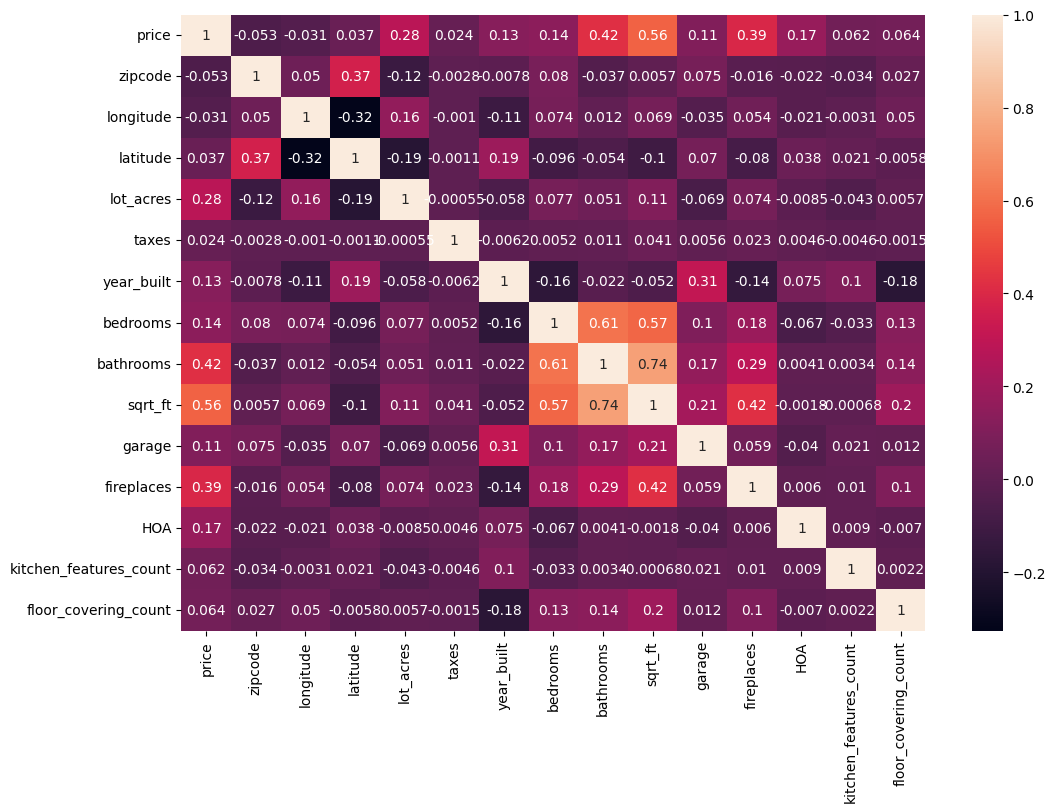

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(housedf.corr(), annot=True)
plt.show()

In [ ]:
train_df.drop(["latitude", "longitude",
               "floor_covering_count", "kitchen_features_count",
               "price_per_sqft", "cat", "taxes"], axis=1, inplace=True)
train_df

,price,lot_acres,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,knn_predictions
0,590000.0,0.34,2003,4,3.0,3322.0,3.0,2,97.0,12.0
1,690000.0,0.90,1997,5,3.0,4504.0,3.0,3,50.0,12.0
2,545000.0,4.21,2001,3,3.0,3004.0,3.0,2,33.0,12.0
3,525000.0,0.24,1989,3,2.0,2672.0,2.0,1,130.0,12.0
4,520000.0,1.36,1986,2,2.0,2453.0,2.0,2,120.0,11.0
...,...,...,...,...,...,...,...,...,...,...
3470,565000.0,1.32,1970,5,4.0,3600.0,2.0,3,0.0,12.0
3471,1055000.0,1.05,2014,3,4.0,3903.0,3.0,1,194.0,10.0
3472,550000.0,0.53,1999,3,3.0,2870.0,3.0,2,31.0,12.0
3473,947500.0,0.97,2004,5,5.0,4488.0,4.0,2,11.0,11.0


In [ ]:
test_df["knn_predictions"] = ytest_pred_knn
test_df

,price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_features_count,floor_covering_count,price_per_sqft,cat,knn_predictions
0,2000000.0,-110.848679,32.321134,0.64,11322.00,2001,5,6.0,7471.0,3.0,5,123.0,6,4,267.701780,10,12.0
1,2400000.0,-110.918097,32.337925,3.42,22655.99,2005,4,7.0,6356.0,4.0,3,421.0,6,3,377.595972,8,12.0
2,2550000.0,-110.922044,32.290263,2.84,22070.48,2004,5,8.0,8110.0,4.0,6,194.0,11,4,314.426634,9,11.0
3,2175000.0,-110.910663,32.338282,1.27,21795.32,1997,5,6.0,7132.0,3.0,2,422.0,5,2,304.963545,9,10.0
4,1900000.0,-110.931119,32.290474,1.08,26642.70,2008,5,8.0,7831.0,4.0,0,0.0,6,3,242.625463,11,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,515000.0,-110.868705,32.532536,0.26,3847.38,1994,3,3.0,3330.0,2.5,2,199.0,11,3,154.654655,12,11.0
865,535000.0,-110.959095,32.315758,0.72,5778.83,1986,3,3.0,3039.0,2.0,1,5.0,11,2,176.044752,12,12.0
866,545800.0,-111.018040,32.388419,2.89,5162.77,2012,3,2.0,2412.0,3.0,1,55.0,11,2,226.285240,11,11.0
867,530000.0,-110.736350,32.253369,0.58,3939.84,2004,3,3.0,2577.0,3.0,1,12.0,14,3,205.665503,11,11.0


In [ ]:
test_df.drop(["latitude", "longitude",
               "floor_covering_count", "kitchen_features_count",
               "price_per_sqft", "cat", "taxes"], axis=1, inplace=True)
test_df

,price,lot_acres,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,knn_predictions
0,2000000.0,0.64,2001,5,6.0,7471.0,3.0,5,123.0,12.0
1,2400000.0,3.42,2005,4,7.0,6356.0,4.0,3,421.0,12.0
2,2550000.0,2.84,2004,5,8.0,8110.0,4.0,6,194.0,11.0
3,2175000.0,1.27,1997,5,6.0,7132.0,3.0,2,422.0,10.0
4,1900000.0,1.08,2008,5,8.0,7831.0,4.0,0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...
864,515000.0,0.26,1994,3,3.0,3330.0,2.5,2,199.0,11.0
865,535000.0,0.72,1986,3,3.0,3039.0,2.0,1,5.0,12.0
866,545800.0,2.89,2012,3,2.0,2412.0,3.0,1,55.0,11.0
867,530000.0,0.58,2004,3,3.0,2577.0,3.0,1,12.0,11.0


In [ ]:
# Define train and test data for linear regression

X_train_lr = train_df.drop("price", axis=1)
y_train_lr = train_df["price"]


X_test_lr = test_df.drop("price", axis=1)
y_test_lr = test_df["price"]

X_train_lr.shape, y_train_lr.shape, X_test_lr.shape, y_test_lr.shape

((3475, 9), (3475,), (869, 9), (869,))

In [ ]:
X_train_lr

,lot_acres,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,knn_predictions
0,0.34,2003,4,3.0,3322.0,3.0,2,97.0,12.0
1,0.90,1997,5,3.0,4504.0,3.0,3,50.0,12.0
2,4.21,2001,3,3.0,3004.0,3.0,2,33.0,12.0
3,0.24,1989,3,2.0,2672.0,2.0,1,130.0,12.0
4,1.36,1986,2,2.0,2453.0,2.0,2,120.0,11.0
...,...,...,...,...,...,...,...,...,...
3470,1.32,1970,5,4.0,3600.0,2.0,3,0.0,12.0
3471,1.05,2014,3,4.0,3903.0,3.0,1,194.0,10.0
3472,0.53,1999,3,3.0,2870.0,3.0,2,31.0,12.0
3473,0.97,2004,5,5.0,4488.0,4.0,2,11.0,11.0


In [ ]:
y_train_lr

0        590000.0
1        690000.0
2        545000.0
3        525000.0
4        520000.0
          ...    
3470     565000.0
3471    1055000.0
3472     550000.0
3473     947500.0
3474     787000.0
Name: price, Length: 3475, dtype: float64

In [ ]:
X_test_lr

,lot_acres,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,knn_predictions
0,0.64,2001,5,6.0,7471.0,3.0,5,123.0,12.0
1,3.42,2005,4,7.0,6356.0,4.0,3,421.0,12.0
2,2.84,2004,5,8.0,8110.0,4.0,6,194.0,11.0
3,1.27,1997,5,6.0,7132.0,3.0,2,422.0,10.0
4,1.08,2008,5,8.0,7831.0,4.0,0,0.0,12.0
...,...,...,...,...,...,...,...,...,...
864,0.26,1994,3,3.0,3330.0,2.5,2,199.0,11.0
865,0.72,1986,3,3.0,3039.0,2.0,1,5.0,12.0
866,2.89,2012,3,2.0,2412.0,3.0,1,55.0,11.0
867,0.58,2004,3,3.0,2577.0,3.0,1,12.0,11.0


# 5. Train and Test Regression Model

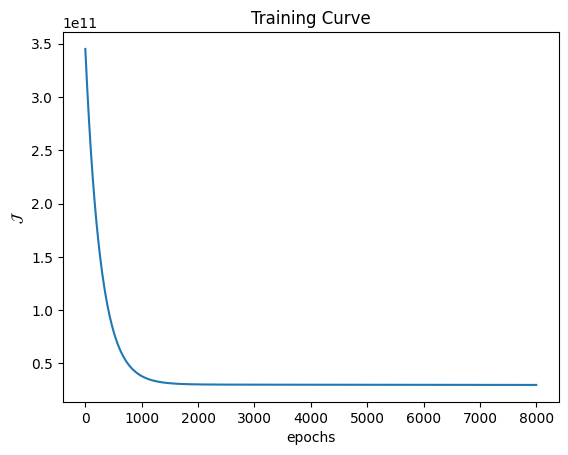

In [ ]:
# Train lr model
lr = MVLinearRegression()
lr.fit(X_train_lr.to_numpy(), y_train_lr.to_numpy(), eta=1e-10, epochs=8e3, show_curve=True)

In [ ]:
# R Squared for train set
y_train_pred = lr.predict(X_train_lr.to_numpy())
R2(y_train_lr, y_train_pred)

0.3885055648531519

In [ ]:
y_train_pred

array([717845.76693345, 916010.79887582, 662871.55898713, ...,
       640051.83944004, 913140.72395978, 845277.26359971])

In [ ]:
# R Squared for test set
y_test_pred = lr.predict(X_test_lr)
R2(y_test_lr, y_test_pred)

0.42559534364188

In [ ]:
y_test_pred

0      1.418386e+06
1      1.235953e+06
2      1.527763e+06
3      1.366303e+06
4      1.477437e+06
           ...     
864    7.203546e+05
865    6.670914e+05
866    5.642078e+05
867    5.906427e+05
868    6.507174e+05
Length: 869, dtype: float64

In [ ]:
y_test_lr

0      2000000.0
1      2400000.0
2      2550000.0
3      2175000.0
4      1900000.0
         ...    
864     515000.0
865     535000.0
866     545800.0
867     530000.0
868     550000.0
Name: price, Length: 869, dtype: float64

# Functions to Predict new data

In [ ]:
# Function to get latitude and longitude from address
from geopy.geocoders import Nominatim as nt

def get_latitude_longitude(address):
    geolocator = nt(user_agent="Techo")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude


In [ ]:
# Function to get address from latitude and longitude
from geopy.geocoders import Nominatim as nt

def get_address(latitude, longitude):
  geolocator = nt(user_agent="DSUnited")
  location = geolocator.reverse((latitude, longitude))

  address = location.address
  return address


In [ ]:
# Function to predict house price
def predict_house_price(knn_model, linear_model):

    # Accept input from the user
    lat_long = get_latitude_longitude(input("Enter the Address: "))
    latitude = lat_long[0]
    longitude = lat_long[1]
    yearbuilt = int(input("Enter the Year Built: "))
    area = float(input("Enter the Area in Square Feet: "))
    bathrooms = float(input("Enter the number of Bathrooms: "))
    bedrooms = int(input("Enter the number of Bedrooms: "))
    fireplaces = int(input("Enter the number of Fireplaces: "))
    garage = float(input("Enter the number of Garages: "))
    lotacres = float(input("Enter the Lot Acres: "))
    hoa = float(input("Enter the HOA: "))

    # Create a dictionary for knn
    dataknn = {
        'latitude': [latitude],
        'longitude': [longitude],
        'year_built': [yearbuilt],
        'sqrt_ft': [area],
        'bathrooms': [bathrooms],
        'bedrooms': [bedrooms],
        'fireplaces': [fireplaces],
        'garage': [garage],
        'lot_acres': [lotacres],
        'HOA': [hoa]
    }

    # Create knn DataFrame using the dictionary
    knndf = pd.DataFrame(dataknn)

    # Create knn predictions
    knn_pred = knn_model.predict(knndf.to_numpy(), 7)

    # Create a dictionary for lr
    datalr = {
        'lot_acres': [lotacres],
        'year_built': [yearbuilt],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'sqrt_ft': [area],
        'garage': [garage],
        'fireplaces': [fireplaces],
        'HOA': [hoa]
    }

    # Create lr DataFrame using the dictionary
    lrdf = pd.DataFrame(datalr)
    lrdf["knn_predictions"] = knn_pred

    # Use the linear regression model to predict the price
    price_prediction = linear_model.predict(lrdf.to_numpy())[0]

    print(f"Predicted House Price: {round(price_prediction, 1)}")


In [ ]:
# Function to predict house price
def predict_house_price_coord(knn_model, linear_model):

    # Accept input from the user
    latitude = float(input("Enter the Latitude: "))
    longitude = float(input("Enter the Longitude: "))
    yearbuilt = int(input("Enter the Year Built: "))
    area = float(input("Enter the Area in Square Feet: "))
    bathrooms = float(input("Enter the number of Bathrooms: "))
    bedrooms = int(input("Enter the number of Bedrooms: "))
    fireplaces = int(input("Enter the number of Fireplaces: "))
    garage = float(input("Enter the number of Garages: "))
    lotacres = float(input("Enter the Lot Acres: "))
    hoa = float(input("Enter the HOA: "))

    # Create a dictionary for knn
    dataknn = {
        'latitude': [latitude],
        'longitude': [longitude],
        'year_built': [yearbuilt],
        'sqrt_ft': [area],
        'bathrooms': [bathrooms],
        'bedrooms': [bedrooms],
        'fireplaces': [fireplaces],
        'garage': [garage],
        'lot_acres': [lotacres],
        'HOA': [hoa]
    }

    # Create knn DataFrame using the dictionary
    knndf = pd.DataFrame(dataknn)

    # Create knn predictions
    knn_pred = knn_model.predict(knndf.to_numpy(), 7)

    # Create a dictionary for lr
    datalr = {
        'lot_acres': [lotacres],
        'year_built': [yearbuilt],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'sqrt_ft': [area],
        'garage': [garage],
        'fireplaces': [fireplaces],
        'HOA': [hoa]
    }

    # Create lr DataFrame using the dictionary
    lrdf = pd.DataFrame(datalr)
    lrdf["knn_predictions"] = knn_pred

    # Use the linear regression model to predict the price
    price_prediction = linear_model.predict(lrdf.to_numpy())[0]

    print(f"Predicted House Price: {round(price_prediction, 1)}")


# Predict new data

In [ ]:
predict_house_price(knn,lr)

Enter the Address: 5075 Fairmont Rd SE
Enter the Year Built: 1979
Enter the Area in Square Feet: 1132
Enter the number of Bathrooms: 2
Enter the number of Bedrooms: 2
Enter the number of Fireplaces: 0
Enter the number of Garages: 1
Enter the Lot Acres: 0.03
Enter the HOA: 125
Predicted House Price: 346888.6


In [ ]:
predict_house_price_coord(knn,lr)

Enter the Latitude: 32.226220
Enter the Longitude: -110.956870
Enter the Year Built: 1935
Enter the Area in Square Feet: 1650
Enter the number of Bathrooms: 2
Enter the number of Bedrooms: 3
Enter the number of Fireplaces: 1
Enter the number of Garages: 1
Enter the Lot Acres: 0.12
Enter the HOA: 0
Predicted House Price: 428622.4


In [ ]:
predict_house_price_coord(knn,lr)

Enter the Latitude: 32.293110
Enter the Longitude: -110.932660
Enter the Year Built: 2000
Enter the Area in Square Feet: 2368
Enter the number of Bathrooms: 2
Enter the number of Bedrooms: 3
Enter the number of Fireplaces: 1
Enter the number of Garages: 2
Enter the Lot Acres: 1.76
Enter the HOA: 0
Predicted House Price: 554846.7
